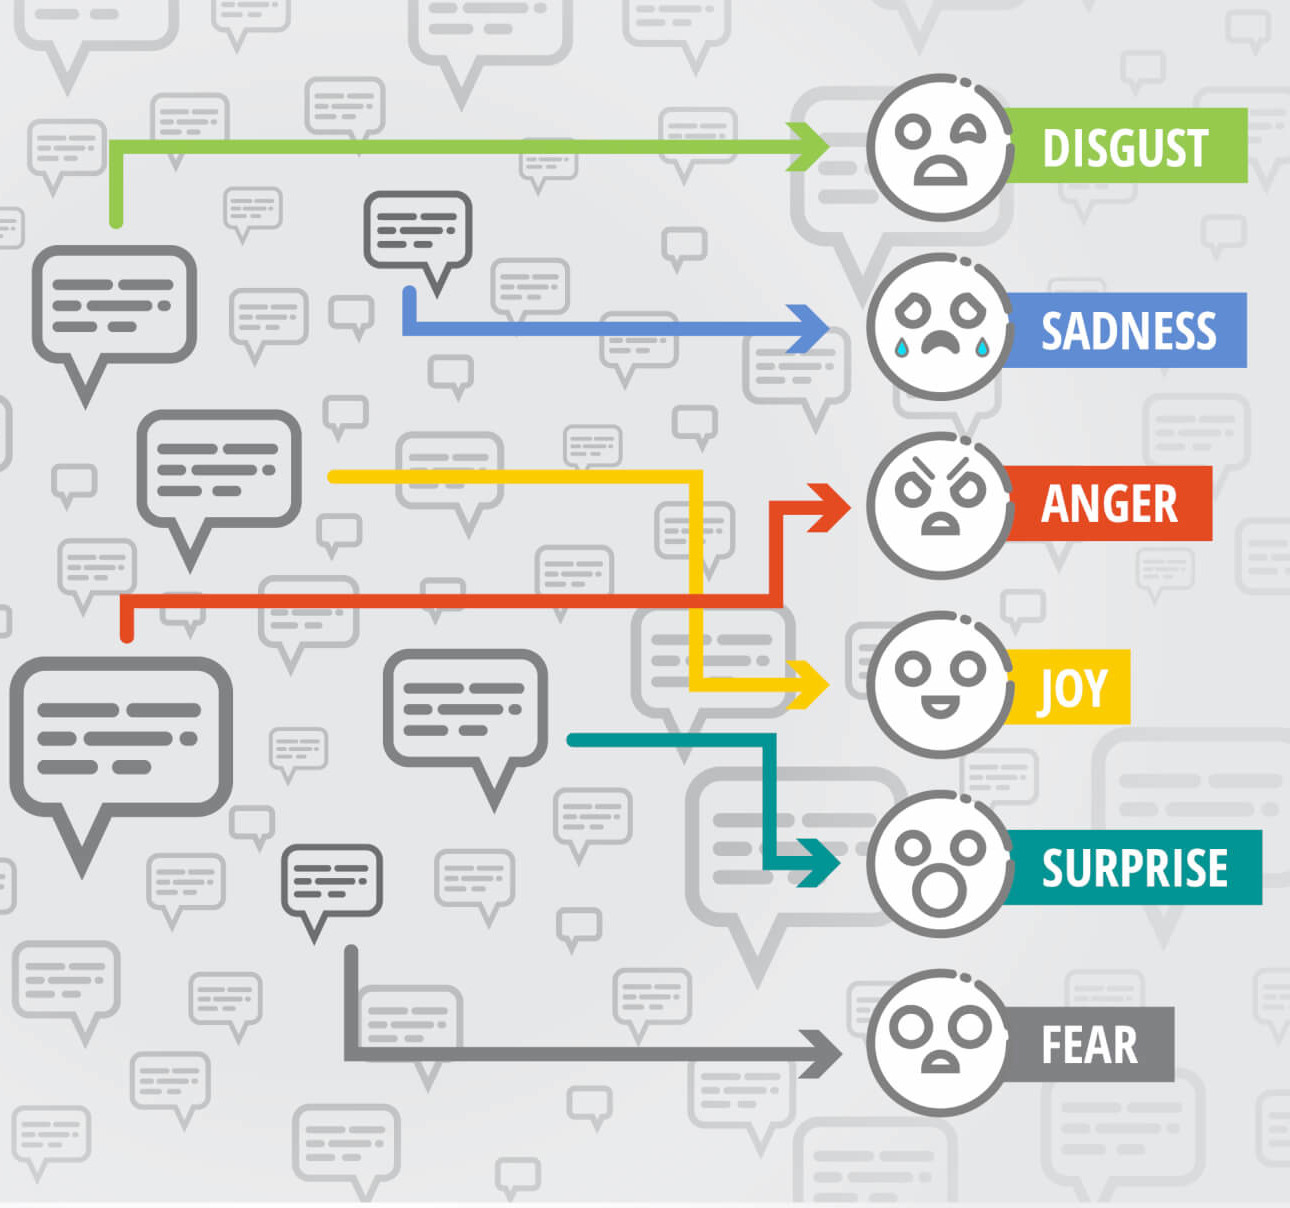

In [1]:
from IPython.display import Image
Image(filename='1.jpg')

In [4]:
"""
Project: Sentiment Analysis on Movie Reviews
Author: Jyoti Prakash Sahoo
"""

'\nProject: Sentiment Analysis on Movie Reviews\nAuthor: Jyoti Prakash Sahoo\n'

In [6]:
#import some necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

Since labels of test.tsv is not available, we shall experiment with train.tsv throughout

In [7]:
data = pd.read_csv('train.tsv',sep='\t') #let's read the training dataset

In [8]:
data.head() #check the head of the data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [9]:
#The sentiment labels are:

# 0 - negative; 1 - somewhat negative; 2 - neutral; 3 - somewhat positive; 4 - positive

In [10]:
# let us check the phrase of the first data of the dataset
data.iloc[0]['Phrase']

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [11]:
# let us check the phrase of the second data of the dataset
data.iloc[1]['Phrase']

'A series of escapades demonstrating the adage that what is good for the goose'

#  Exploratory Data Analysis

In [12]:
def get_polarity(data):
        # set sentiment
        if data['Sentiment'] == 0:
            return 'negative'
        elif data['Sentiment'] == 1:
            return 'somewhat negative'
        elif data['Sentiment']==2:
            return 'neuteral'
        elif data['Sentiment']==3:
            return 'somewhat positive'
        else:
            return 'positive'
          

In [13]:
data['Polarity'] = data.apply(get_polarity,axis=1)

In [14]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Polarity
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neuteral
2,3,1,A series,2,neuteral
3,4,1,A,2,neuteral
4,5,1,series,2,neuteral


Let's plot it!

neuteral             79582
somewhat positive    32927
somewhat negative    27273
positive              9206
negative              7072
Name: Polarity, dtype: int64


Text(0.5, 0, 'Sentiment expressed in Reviews')

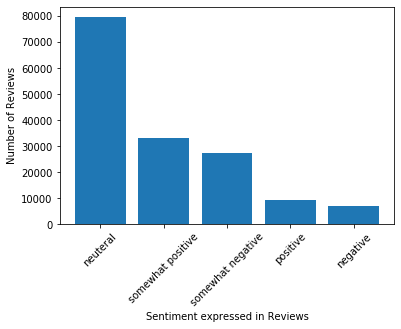

In [15]:

Index = [1,2,3,4,5]
print(data.Polarity.value_counts())
plt.bar(Index,data.Polarity.value_counts())
plt.xticks(Index,['neuteral','somewhat positive','somewhat negative','positive','negative'],rotation=45)
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')


Let's see if our data has any null values.

In [16]:
data.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
Polarity      0
dtype: int64

In [18]:
data.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
Polarity      0
dtype: int64

In [19]:
data['Length'] = data['Phrase'].apply(lambda x: len(str(x).split(' ')))

In [20]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Polarity,Length
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,37
1,2,1,A series of escapades demonstrating the adage ...,2,neuteral,14
2,3,1,A series,2,neuteral,2
3,4,1,A,2,neuteral,1
4,5,1,series,2,neuteral,1


In [21]:
data['Length'].unique()

array([37, 14,  2,  1, 12, 11, 10,  3,  7,  6,  5,  4, 23, 22, 20, 19, 18,
       15,  9,  8, 21, 26, 25, 16, 13, 17, 30, 28, 27, 24, 41, 40, 36, 29,
       31, 32, 34, 33, 42, 39, 38, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52], dtype=int64)

Let's check out for any pattern

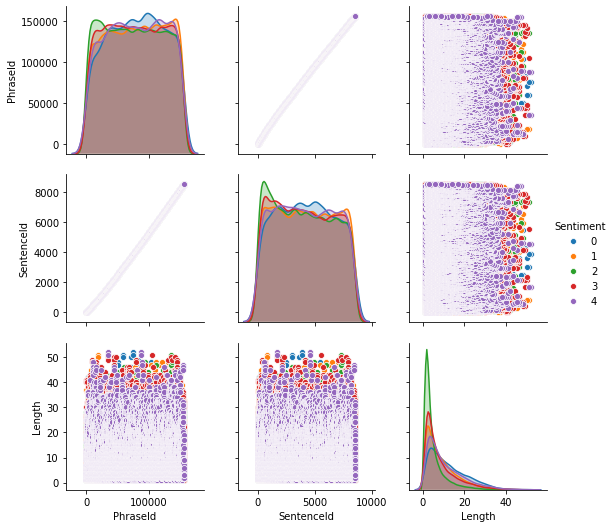

In [23]:
import seaborn as sns
sns.pairplot(data,hue='Sentiment',vars=['PhraseId','SentenceId','Length'])

In [24]:
#so sentiment 4 has short length reviews but also has long length reviews. But mainly sentiment 0,1 and 2 have longer length reviews. 
#Classifying on basis of length seems difficult.
#let's move on to next analysis

In [25]:
#eliminate all non empty phrases
data = data[data['Phrase'].str.len() >0]
data[data['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Polarity,Length


Cool!

# Text pre-processing 

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number. In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers). As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.
First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation

There are a lot of ways to continue normalizing this text. Such as Stemming or distinguishing by part of speech.Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).Stemming is a part of linguistic studies in morphology and artificial intelligence (AI) information retrieval and extraction. Lemmatization. This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [26]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

In [27]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all capitalized words
    2. Remove all punctuation
    3. Remove all stopwords
    4. Lemmatize the resultant cleaned phrase
    5. Finally returns the processed list of words
    """
    #Remove capitalized words (movie names, actor names, etc.)
    nocaps = [name for name in mess if name.islower()]
    
    #Join the characters again to form the string.
    nocaps = ' '.join(nocaps)
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in nocaps if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Join the characters again to form the string.
    nostopwords = ' '.join(nostopwords)
    nostopwords = nostopwords.split()
    #Lemmatize
    for i in range(0,len(nostopwords)):
        
        k = nostopwords.pop(0)
        if k not in string.punctuation:
            nostopwords.append(lm.lemmatize(k).lower())  
    
    return nostopwords

Let's do some oversampling to fix the class imbalance.

In [28]:
#because of our imbalanced classes (categorical labels) we can try over-sampling 
#(making copies of the under-represented classes)
sent_2 = data[data['Sentiment']==2]
#we will copy class 0, 11 times
sent_0 = data[data['Sentiment']==0]
#we will copy class 1, 2 times
sent_1 = data[data['Sentiment']==1]
#we will copy class 3, 2 times
sent_3 = data[data['Sentiment']==3]
#we will copy class 4, 8 times
sent_4 = data[data['Sentiment']==4]

#-----------------------------------------------------
data = data.append([sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0])
data = data.append([sent_1,sent_1])
data = data.append([sent_3])
data = data.append([sent_4,sent_4,sent_4,sent_4,sent_4,sent_4,sent_4])


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378695 entries, 0 to 156010
Data columns (total 6 columns):
PhraseId      378695 non-null int64
SentenceId    378695 non-null int64
Phrase        378695 non-null object
Sentiment     378695 non-null int64
Polarity      378695 non-null object
Length        378695 non-null int64
dtypes: int64(4), object(2)
memory usage: 30.2+ MB


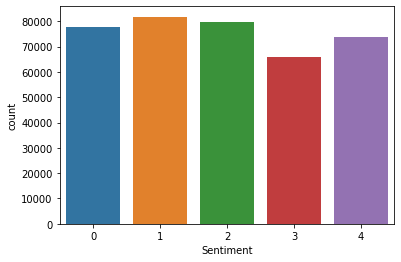

In [30]:
#to check the amounts of each class
sns.countplot(data=data,x='Sentiment')
#one can also go for simple plots using matplotlib

Fair Enough!

In [32]:
from sklearn.model_selection import train_test_split
X = data['Phrase']
y = data['Sentiment']
x_train,x_test,y_train,y_test = train_test_split(X,y)
#default test_size  will be 0.25, cool enough! 

# Vectorisation

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with. Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand. We'll do that in three steps using the bag-of-words model: Count how many times does a word occur in each message (Known as term frequency) Weigh the counts, so that frequent tokens get lower weight (inverse document frequency) Normalize the vectors to unit length, to abstract from the original text length (L2 norm)
After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

# TF-IDF

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model. Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears. TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

Test1: The Naive Bayes

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [36]:
pipeNB = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [37]:
pipeNB.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000207AD0B6F78>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [38]:
pred = pipeNB.predict(x_test) #predict testing data

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11     19547
           1       0.22      0.64      0.33     20328
           2       0.27      0.33      0.30     19854
           3       0.00      0.00      0.00     16642
           4       0.26      0.09      0.13     18303

    accuracy                           0.24     94674
   macro avg       0.20      0.23      0.18     94674
weighted avg       0.21      0.24      0.18     94674



Naive Bayes doesn't perform well.Perhaps applying it on undersampled data may give better results and might push the accuracy a bit up.

But I am looking for models which would give accuracy above 70%. So let's explore!

Test2:Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
pipeDTC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])
pipeDTC.fit(x_train,y_train)
pred = pipeDTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     19547
           1       0.78      0.79      0.79     20328
           2       0.66      0.58      0.62     19854
           3       0.74      0.63      0.68     16642
           4       0.87      0.97      0.91     18303

    accuracy                           0.79     94674
   macro avg       0.78      0.79      0.78     94674
weighted avg       0.78      0.79      0.78     94674



That's nice!

Test3: Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
pipeRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [41]:
pipeRFC.fit(x_train,y_train)
pred = pipeRFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     19547
           1       0.77      0.77      0.77     20328
           2       0.67      0.61      0.64     19854
           3       0.75      0.66      0.70     16642
           4       0.89      0.97      0.92     18303

    accuracy                           0.80     94674
   macro avg       0.79      0.80      0.79     94674
weighted avg       0.79      0.80      0.79     94674



Ah! Almost similar!

Test4: K Nearest Neigbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
pipeKNN = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=3))
])

In [43]:
pipeKNN.fit(x_train,y_train)
pred = pipeKNN.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87     19547
           1       0.64      0.74      0.69     20328
           2       0.60      0.45      0.51     19854
           3       0.62      0.49      0.55     16642
           4       0.83      0.93      0.88     18303

    accuracy                           0.71     94674
   macro avg       0.70      0.71      0.70     94674
weighted avg       0.70      0.71      0.70     94674



KNN also performs good. Fine tuning might increase the accuracy.
So Decision Tree and random Forests performed really good in this context.

In a next version I shall try with LSTM.

Thank You!